# Problem statement
### Adult Salary Prediction

 Our task is to analyze the dataset and predict whether the income of an adult will exceed 50k per year or not.
 * We have been given 14 features.
 
 Adult dataset link : http://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
import numpy as np  # For mathematical calculations
import pandas as pd  # For data preprocessing 
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For data visualization
from sklearn.preprocessing import StandardScaler  # For feature scaling
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For detecting multicollinearity
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score  # For evaluating model performance
from sklearn.tree import DecisionTreeClassifier  # For decision tree classification
from sklearn.ensemble import RandomForestClassifier  # For random forest classification
from sklearn.svm import SVC  # For support vector machine classification
from imblearn.over_sampling import SMOTE  # For oversampling the minority class
import warnings
warnings.filterwarnings("ignore")  # To ignore warnings for cleaner output


In [2]:
df = pd.read_csv("adult_data.csv")
df.head()

,age,workclass,education,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns

Index(['age', ' workclass', ' education', ' occupation', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [4]:
len(df.columns)

11

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    education       32561 non-null  object
 3    occupation      32561 non-null  object
 4    race            32561 non-null  object
 5    sex             32561 non-null  object
 6    capital-gain    32561 non-null  int64 
 7    capital-loss    32561 non-null  int64 
 8    hours-per-week  32561 non-null  int64 
 9    native-country  32561 non-null  object
 10   salary          32561 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.7+ MB


In [6]:
df.shape

(32561, 11)

In [7]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel=' salary', ylabel='count'>

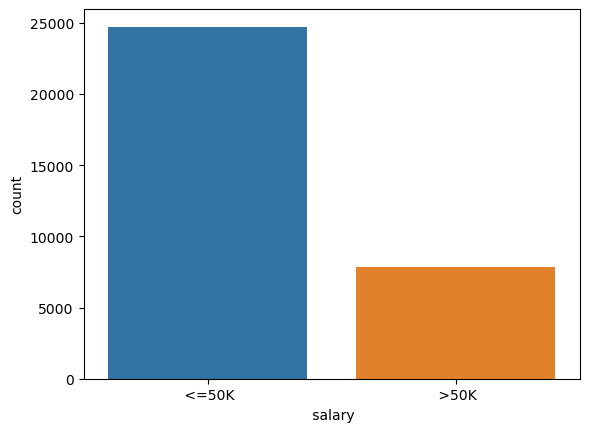

In [8]:
sns.countplot(x=' salary',data=df )

In [9]:
df[" salary"].value_counts()

 <=50K    24720
 >50K      7841
Name:  salary, dtype: int64

In [10]:
print(f"<= 50k : {round(24720 /32561 * 100 , 2)}")
print(f"> 50k : {round(7841 /32561 * 100 , 2)}")

<= 50k : 75.92
> 50k : 24.08


## Exploratory data analysis and Feature Engineering

In [11]:
## Here we will check the missing values in our dataset
df.isnull().sum()

age                0
 workclass         0
 education         0
 occupation        0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [12]:
numerical = [i for i in df.columns if df[i].dtypes != "O"]

In [13]:
numerical

['age', ' capital-gain', ' capital-loss', ' hours-per-week']

In [14]:
for i in numerical:
    print(f" {i}  :  {len(df[i].unique())}")

 age  :  73
  capital-gain  :  119
  capital-loss  :  92
  hours-per-week  :  94


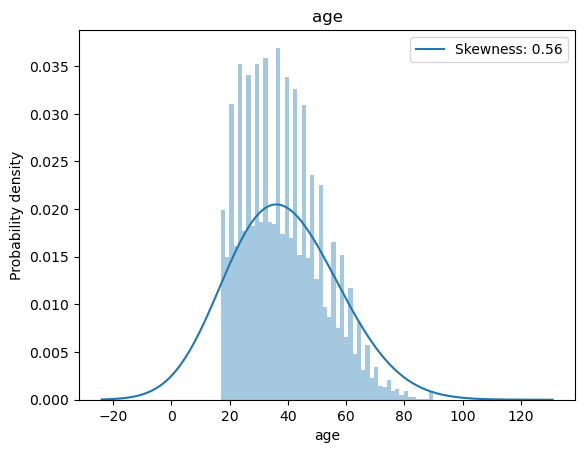

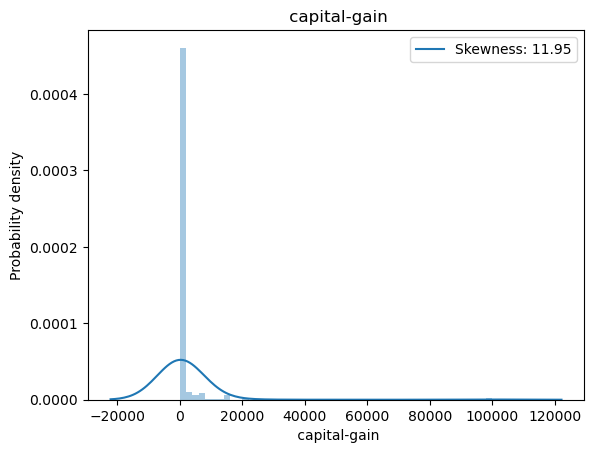

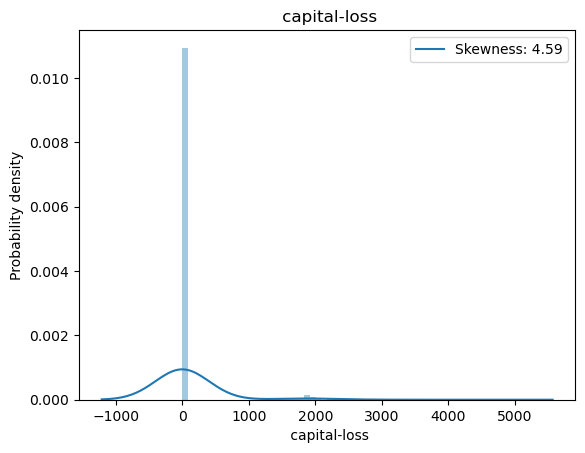

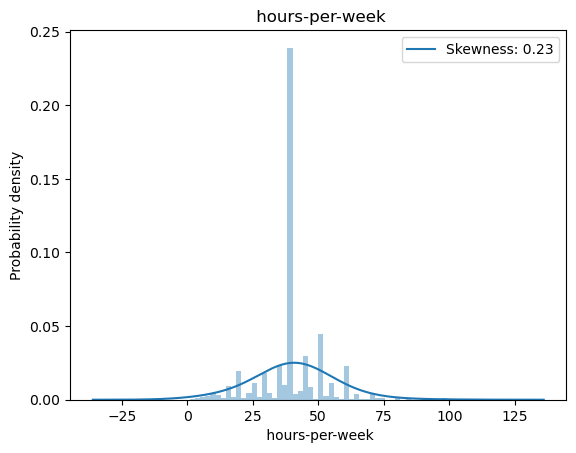

In [15]:
for feature in numerical:
    bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
    bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

In [16]:
df["age"] = np.log(df["age"])

In [17]:
df.columns

Index(['age', ' workclass', ' education', ' occupation', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

## Handling categorical data 

In [18]:
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [19]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

  workclass  :  9
  education  :  16
  occupation  :  15
  race  :  5
  sex  :  2
  native-country  :  42
  salary  :  2


In [20]:
for feature in  categorical:
    print(df[feature].value_counts()) 
    print("\n \n ")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

 
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

 
 
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support       

## Handling missing values in categorical features

In [21]:
print(f"workclass : {round(2093 / 32561 , 4) *100}%")
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native-country : {round(583 / 32561 , 4) *100}%")

workclass : 6.43%
occupation : 5.66%
native-country : 1.79%


In [22]:
df[" occupation"].mode()[0]

' Prof-specialty'

**here we have less than 6 percent missing values so we can fill it with mode value**

In [23]:
df[" workclass"] = df[' workclass'].str.replace('?', 'Private' )
df[' occupation'] = df[' occupation'].str.replace('?', 'Prof-specialty' )
df[' native-country'] = df[' native-country'].str.replace('?', 'United-States' )

In [24]:
# education Category
df[" education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df[" education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

In [25]:
# income
df[" salary"] = df[" salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

In [26]:
df.head()

,age,workclass,education,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,3.663562,State-gov,Bachelors,Adm-clerical,White,Male,2174,0,40,United-States,0
1,3.912023,Self-emp-not-inc,Bachelors,Exec-managerial,White,Male,0,0,13,United-States,0
2,3.637586,Private,HS-grad,Handlers-cleaners,White,Male,0,0,40,United-States,0
3,3.970292,Private,school,Handlers-cleaners,Black,Male,0,0,40,United-States,0
4,3.332205,Private,Bachelors,Prof-specialty,Black,Female,0,0,40,Cuba,0


In [27]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

  workclass  :  8
  education  :  6
  occupation  :  14
  race  :  5
  sex  :  2
  native-country  :  41
  salary  :  2


In [28]:
df[" education"].unique()

array([' Bachelors', ' HS-grad', ' school', ' Masters', ' higher',
       ' Doctorate'], dtype=object)

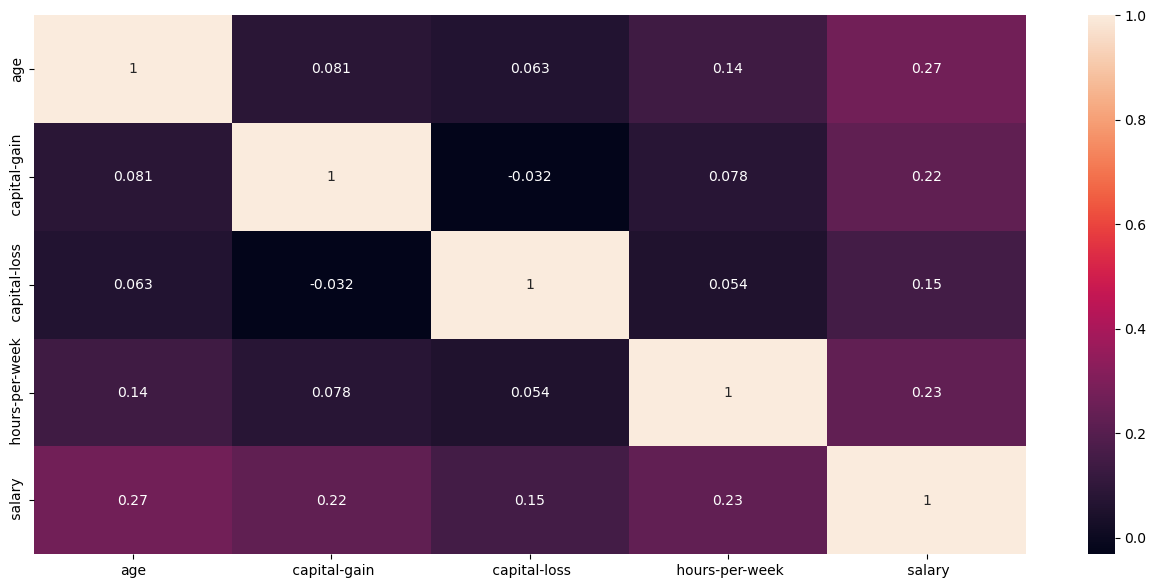

In [29]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True);

In [30]:
from sklearn.preprocessing import  LabelEncoder

In [31]:
df = df.apply(LabelEncoder().fit_transform)
df .head()

,age,workclass,education,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,22,6,0,0,4,1,25,0,39,38,0
1,33,5,0,3,4,1,0,0,12,38,0
2,21,3,2,5,4,1,0,0,39,38,0
3,36,3,5,5,2,1,0,0,39,38,0
4,11,3,0,9,2,0,0,0,39,4,0


## Feature engineering on test data

In [32]:
df_test = pd.read_csv("adult_test.csv")
df_test.head()

,age,workclass,education,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,11th,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,HS-grad,Farming-fishing,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,Assoc-acdm,Protective-serv,White,Male,0,0,40,United-States,>50K.
3,44,Private,Some-college,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K.
4,18,?,Some-college,?,White,Female,0,0,30,United-States,<=50K.


In [33]:
## apply log on skewed data
df_test["age"] = np.log(df_test["age"])


## handling missing values in categorical variable
df_test[" workclass"] = df_test[' workclass'].astype(str).str.replace('?', 'Private')
df_test[' occupation'] = df_test[' occupation'].astype(str).str.replace('?', 'Prof-specialty')
df_test[' native-country'] = df_test[' native-country'].astype(str).str.replace('?', 'United-States')


# education Category
df_test[" education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df_test[" education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)


# income
df_test[" salary"] = df_test[" salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

df_test = df_test.apply(LabelEncoder().fit_transform)

In [34]:
df_test.head()

,age,workclass,education,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,8,3,5,6,2,1,0,0,39,37,0
1,21,3,2,4,4,1,0,0,49,37,0
2,11,1,4,10,4,1,0,0,39,37,1
3,27,3,4,6,2,1,90,0,39,37,1
4,1,3,4,9,4,0,0,0,29,37,0


In [35]:
df_test.shape

(16281, 11)

# Pre Processing

In [104]:
# Preprocess the data for machine learning
target_name = ' salary'
y = df[target_name]
x_train = df.drop(target_name, axis=1)

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_res = sc.fit_transform(x_train)

In [106]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [108]:
# Calculate variance inflation factor (VIF) for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_res, i) for i in range(x_res.shape[1])]
vif["features"] = x_train.columns

In [109]:
# Display VIF for each feature
print("Variance Inflation Factor (VIF):")
pd.DataFrame(vif)

Variance Inflation Factor (VIF):


,VIF Factor,features
0,1.031483,age
1,1.008832,workclass
2,1.024136,education
3,1.003528,occupation
4,1.024756,race
5,1.079126,sex
6,1.036486,capital-gain
7,1.015167,capital-loss
8,1.084125,hours-per-week
9,1.016311,native-country


In [110]:
x_res.shape

(32561, 10)

# pre processing on test data

In [111]:
# Preprocess the data for machine learning
target_name = ' salary'
y_test = df_test[target_name]
x_test = df_test.drop(target_name, axis=1)

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_res_test = sc.fit_transform(x_test)

In [113]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [114]:
# Calculate variance inflation factor (VIF) for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_res_test, i) for i in range(x_res_test.shape[1])]
vif["features"] = x_test.columns

In [115]:
# Display VIF for each feature
print("Variance Inflation Factor (VIF):")
pd.DataFrame(vif)

Variance Inflation Factor (VIF):


,VIF Factor,features
0,1.031870,age
1,1.010758,workclass
2,1.023311,education
3,1.003143,occupation
4,1.027873,race
5,1.074759,sex
6,1.036983,capital-gain
7,1.014935,capital-loss
8,1.084480,hours-per-week
9,1.018663,native-country


# MODEL TRAINING

# MODEL EVALUATION

# 1) Decision Tree Classifier

In [116]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = x_res,x_res_test  ,y  , y_test

# Print the shapes of training and testing sets
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (32561, 10)
y_train.shape: (32561,)
X_test.shape: (16281, 10)
y_test.shape: (16281,)


In [132]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on training and testing sets using Decision Tree Classifier
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

In [133]:
# Print accuracy scores and confusion matrix for Decision Tree Classifier
print('Train Accuracy:', accuracy_score(y_train, dt_train_pred) * 100)
print('Accuracy Score:', accuracy_score(y_test, dt_test_pred) * 100)

Train Accuracy: 95.58981603759098
Accuracy Score: 78.20772679810823


In [134]:
print(confusion_matrix(y_test, dt_test_pred))

[[10917  1518]
 [ 2030  1816]]


In [135]:
print(classification_report(y_test, dt_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8432    0.8779    0.8602     12435
           1     0.5447    0.4722    0.5058      3846

    accuracy                         0.7821     16281
   macro avg     0.6939    0.6751    0.6830     16281
weighted avg     0.7727    0.7821    0.7765     16281



In [136]:
print('Precision score of macro is: ' , round(precision_score(y_test , dt_test_pred , average = 'macro')*100,2))
print('Precision score of micro is: ' , round(precision_score(y_test , dt_test_pred , average = 'micro')*100,2))
print('Precision score of weighted is: ' , round(precision_score(y_test , dt_test_pred , average = 'weighted')*100,2))

Precision score of macro is:  69.39
Precision score of micro is:  78.21
Precision score of weighted is:  77.27


In [137]:
print('recall_score score of macro is: ' , round(recall_score(y_test , dt_test_pred , average = 'macro')*100,2))
print('recall_score score of micro is: ' , round(recall_score(y_test , dt_test_pred , average = 'micro')*100,2))
print('recall_score score of weighted is: ' , round(recall_score(y_test , dt_test_pred , average = 'weighted')*100,2))

recall_score score of macro is:  67.51
recall_score score of micro is:  78.21
recall_score score of weighted is:  78.21


In [138]:
print('f1_score score of macro is: ' , round(f1_score(y_test , dt_test_pred , average = 'macro')*100,2))
print('f1_score score of micro is: ' , round(f1_score(y_test , dt_test_pred , average = 'micro')*100,2))
print('f1_score score of weighted is: ' , round(f1_score(y_test , dt_test_pred , average = 'weighted')*100,2))

f1_score score of macro is:  68.3
f1_score score of micro is:  78.21
f1_score score of weighted is:  77.65


## Random Forest

In [142]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100

82.01584669246361

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     12435
           1       0.65      0.52      0.58      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.72      0.73     16281
weighted avg       0.81      0.82      0.81     16281



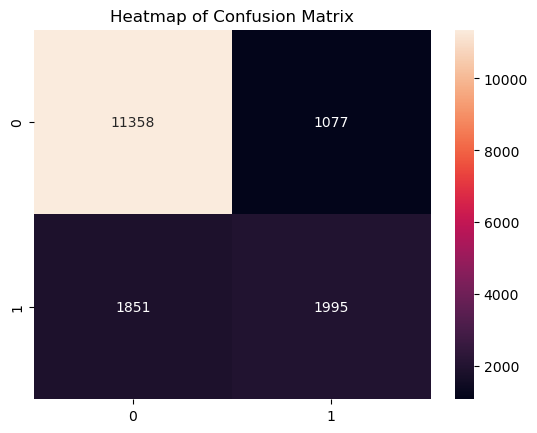

In [141]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

# Support Vector Machine(SVM)

In [143]:
# Train Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predict on training and testing sets using SVC
svc_train_pred = svc_model.predict(X_train)
svc_test_pred = svc_model.predict(X_test)

In [144]:
# Print accuracy scores and confusion matrix for SVC
print('Train Accuracy:', accuracy_score(y_train, svc_train_pred) * 100)
print('Accuracy Score:', accuracy_score(y_test, svc_test_pred) * 100)

Train Accuracy: 82.80151101010411
Accuracy Score: 82.20011055831952


In [145]:
print(confusion_matrix(y_test, svc_test_pred))

[[12043   392]
 [ 2506  1340]]


In [146]:
print(classification_report(y_test, svc_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8278    0.9685    0.8926     12435
           1     0.7737    0.3484    0.4805      3846

    accuracy                         0.8220     16281
   macro avg     0.8007    0.6584    0.6865     16281
weighted avg     0.8150    0.8220    0.7952     16281



# Handling Imbalanced data

In [147]:
# Check value counts of y
print(y.value_counts())

0    24720
1     7841
Name:  salary, dtype: int64


In [161]:
# Apply SMOTE for handling imbalanced dataset
oversample = SMOTE(k_neighbors=4)
X_res1, y_res1 = oversample.fit_resample(x_res, y)

In [162]:
# Print shapes of resampled dataset
print("X_res1.shape:", X_res1.shape)
print("y_res1.shape:", y_res1.shape)

X_res1.shape: (49440, 10)
y_res1.shape: (49440,)


In [163]:
# Check value counts of original and resampled y
print("Original y value counts:")
print(y.value_counts())
print("Resampled y value counts:")
print(pd.Series(y_res1).value_counts())

Original y value counts:
0    24720
1     7841
Name:  salary, dtype: int64
Resampled y value counts:
0    24720
1    24720
Name:  salary, dtype: int64


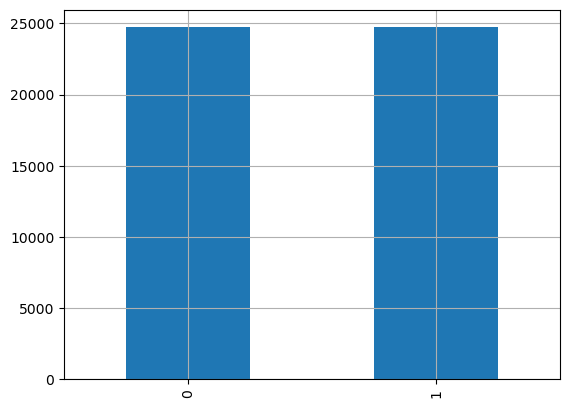

In [164]:
# Plot bar chart of resampled y value counts
pd.Series(y_res1).value_counts().plot.bar()
plt.grid()


# for testing data

In [165]:
oversample = SMOTE(k_neighbors=4)
X_res1test, y_res1test = oversample.fit_resample(x_res_test, y_test)

In [167]:
# Print shapes of resampled dataset
print("X_res1test.shape:", X_res1test.shape)
print("y_res1test.shape:", y_res1test.shape)

X_res1test.shape: (24870, 10)
y_res1test.shape: (24870,)


# Retraining and Re-evaluation

# 1) Decision Tree Classifier

X_train.shape: (49440, 10)
y_train.shape: (49440,)
X_test.shape: (16281, 10)
y_test.shape: (24870,)


In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

In [174]:
print('Decision Tree Classifier (after SMOTE) Train Accuracy: ', accuracy_score(y_train, dt_train_pred) * 100)
print('Decision Tree Classifier (after SMOTE) Accuracy Score: ', accuracy_score(y_test, dt_test_pred) * 100)

Decision Tree Classifier (after SMOTE) Train Accuracy:  96.64644012944984
Decision Tree Classifier (after SMOTE) Accuracy Score:  70.64736630478488


In [175]:
print(confusion_matrix(y_test, dt_test_pred))

[[ 7123  5312]
 [ 1988 10447]]


In [176]:
print(classification_report(y_test, dt_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7818    0.5728    0.6612     12435
           1     0.6629    0.8401    0.7411     12435

    accuracy                         0.7065     24870
   macro avg     0.7224    0.7065    0.7011     24870
weighted avg     0.7224    0.7065    0.7011     24870



# 2) Random Forest

In [177]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7254121431443507

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67     12435
           1       0.67      0.89      0.76     12435

    accuracy                           0.73     24870
   macro avg       0.75      0.73      0.72     24870
weighted avg       0.75      0.73      0.72     24870



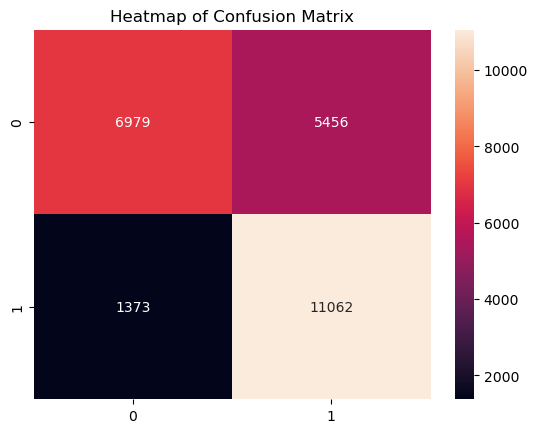

In [179]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

# 3)SVM

In [180]:
# Train Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predict on training and testing sets using SVC
svc_train_pred = svc_model.predict(X_train)
svc_test_pred = svc_model.predict(X_test)

KeyboardInterrupt: 

In [ ]:
# Print accuracy scores and confusion matrix for SVC
print('Train Accuracy:', accuracy_score(y_train, svc_train_pred) * 100)
print('Accuracy Score:', accuracy_score(y_test, svc_test_pred) * 100)

In [ ]:
print(confusion_matrix(y_test, svc_test_pred))

In [ ]:
print(classification_report(y_test, svc_test_pred, digits=4))